In [ ]:
import sys
sys.path.append("/home/eickhoff/esx208/IR_Mech_Interp/MechIR_best_practices/src")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
all_data_pd_dual_encoder = pd.read_csv('./data/patching_unnormalised/sebastian-hofstaetter-distilbert-dot-tas_b-b256-msmarco_bi_TFC1_4000_batch_size_20_features.tsv', sep='\t')
all_data_pd_cross_encoder = pd.read_csv('./data/patching_unnormalised/crystina-z-monoELECTRA_LCE_nneg31_cross_TFC1_4000_batch_size_20_features.tsv', sep='\t')

In [4]:
# Create improved scatter plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with color palette and transparency
sns.scatterplot(data=all_data_pd, y='patching_effect_normalised_absolute_mean', x='score_delta', s=100, alpha=0.7)

# Customize labels and title
plt.xlabel('Score Difference', fontsize=18)
plt.ylabel('Mean Absolute Patching Effect', fontsize=18)
# plt.ylabel(None)
# plt.title('Relationship between Mean Absolute Patching Effect and Score Difference', fontsize=20)

# Add grid
plt.grid(True)
plt.xticks(fontsize=14)

# Save the plot as an image file
# plt.savefig('/mnt/qb/work/eickhoff/esx208/MechIR/notebooks/plots/cross_encoder_scatter_plot_no_penalty.pdf', bbox_inches='tight')
plt.show()

NameError: name 'all_data_pd' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
all_data_pd_dual_encoder

,qid,query,docno,text,relevance,perturbed,perturbed_score,rank,original_score,score_delta,...,patching_effect_absolute_mean,patching_effect_normalised_std,patching_effect_normalised_absolute_mean,patching_effect_normalised_square_std,patching_effect_normalised_square_absolute_mean,patching_effect_normalised_clip_std,patching_effect_normalised_clip_absolute_mean,gini,gini_normalised,gini_normalised_square
0,768208,what is mamey,3186011,This species has an elongated oblong narrow sh...,0,True,100.175990,15,82.655556,17.520432,...,0.321137,0.031930,0.018329,0.031878,0.018300,0.031930,0.018329,0.709444,0.709444,0.709444
1,768208,what is mamey,6835292,Their size and excellent color retention prope...,0,True,96.847060,43,79.524940,17.322120,...,0.287155,0.029767,0.016577,0.029718,0.016550,0.029767,0.016577,0.730078,0.730078,0.730078
2,768208,what is mamey,8041502,‘I have a friend who is selling a product that...,0,True,95.648750,53,79.505974,16.142776,...,0.281040,0.029820,0.017410,0.029763,0.017376,0.029820,0.017410,0.690587,0.690587,0.690587
3,855410,what is theraderm used for,8751749,": to add moisture to (something, such as a per...",0,True,99.954690,4,82.315580,17.639107,...,0.400308,0.033460,0.022694,0.033406,0.022658,0.033460,0.022694,0.630607,0.630607,0.630607
4,121171,define etruscans,7409541,"Fully accessible PDF installation guide, and a...",0,True,92.534590,453,76.635290,15.899300,...,0.253215,0.027328,0.015926,0.027274,0.015895,0.027328,0.015926,0.712927,0.712927,0.712927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,451602,medicare's definition of mechanical ventilation,6286982,Mechanical ventilation is indicated when the p...,3,True,100.882324,43,100.810710,0.071617,...,0.010313,0.225176,0.143996,0.016085,0.010286,0.224064,0.143749,0.537092,0.537092,0.537092
3996,1136962,why did the ancient egyptians call their land ...,596001,The ancient Egyptian name as transliterated fr...,3,True,105.909800,10,105.746956,0.162842,...,0.007792,0.060782,0.047848,0.009769,0.007690,0.060782,0.047848,0.533780,0.533780,0.533780
3997,258062,how long does it take to remove wisdom tooth,4174313,The time it takes to remove the tooth will var...,3,True,109.916580,36,109.735115,0.181465,...,0.012106,0.099384,0.066713,0.017745,0.011912,0.099384,0.066713,0.536046,0.536046,0.536046
3998,583468,what carvedilol used for,7491704,what carvedilol is and what it is used for car...,3,True,106.245370,47,106.122604,0.122765,...,0.019793,0.229389,0.161226,0.027951,0.019645,0.229389,0.161226,0.506416,0.506416,0.506416


In [6]:
data_list = [(all_data_pd_dual_encoder, 'score_delta', 'patching_effect_absolute_mean'), 
             (all_data_pd_dual_encoder, 'score_delta', 'patching_effect_normalised_absolute_mean'), 
             (all_data_pd_dual_encoder, 'score_delta', 'patching_effect_normalised_square_absolute_mean'),
             (all_data_pd_cross_encoder, 'score_delta', 'patching_effect_normalised_absolute_mean'),
             (all_data_pd_cross_encoder, 'score_delta', 'patching_effect_normalised_square_absolute_mean')
]
             
             
            #  (all_data_pd_cross_encoder, 'score_delta', 'patching_effect_absolute_mean'),]

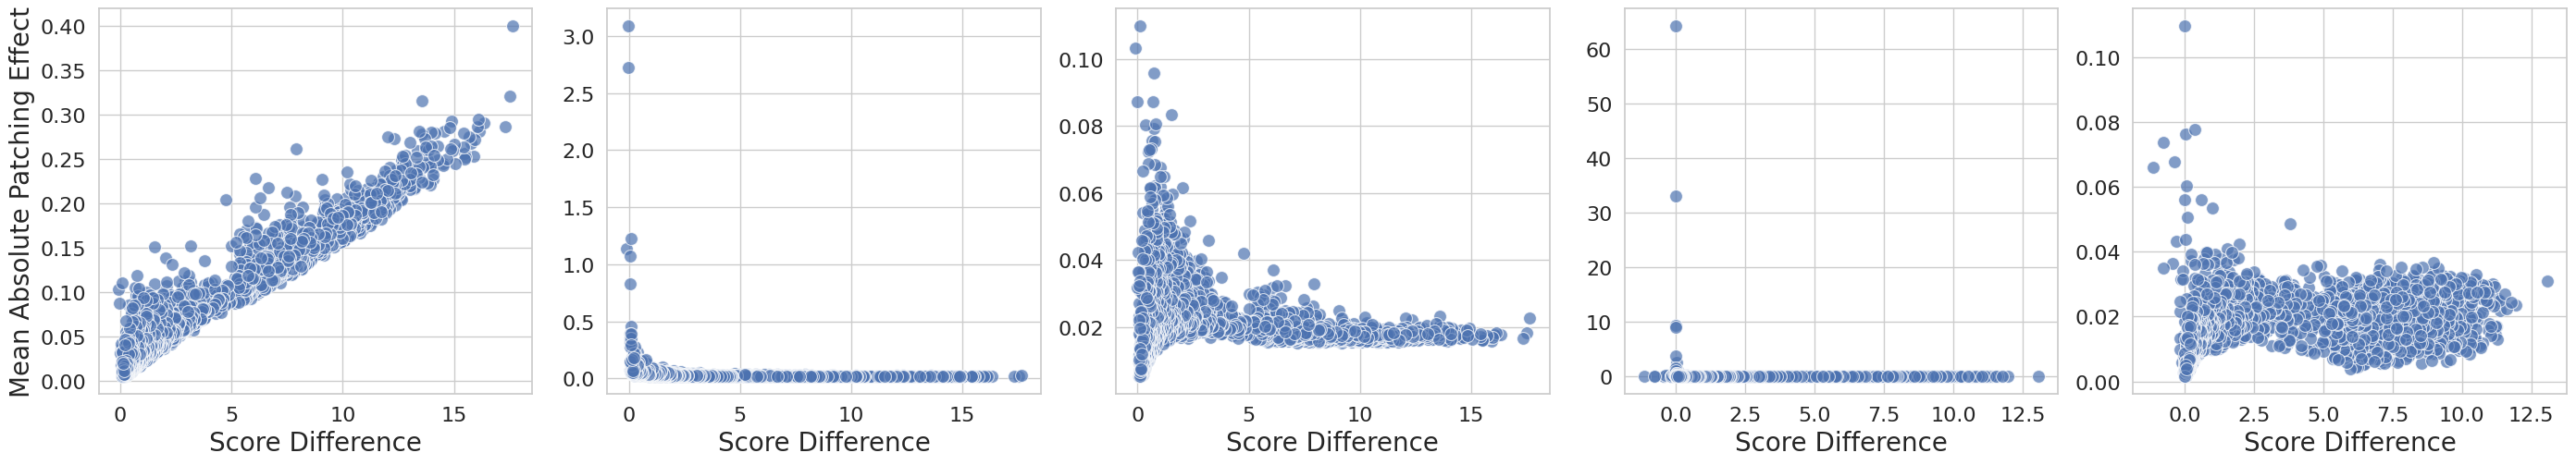

In [7]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 5, figsize=(28, 5.2))
for idx, ax in enumerate(axes):
    sns.scatterplot(
        data=data_list[idx][0],
        y=data_list[idx][2],
        x=data_list[idx][1],
        s=100,
        alpha=0.7,
        ax=ax
    )
    ax.set_xlabel('Score Difference', fontsize=20)
    if idx == 0:
        ax.set_ylabel('Mean Absolute Patching Effect', fontsize=20)
    else:
        ax.set_ylabel('')
    # ax.set_ylabel('Mean Absolute Patching Effect', fontsize=14)
    ax.grid(True)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
plt.tight_layout()
# plt.savefig('notebooks/plots/scatter_plots_camera_ready.pdf', bbox_inches='tight')

In [20]:
data_list_cross_encoder = [
    (all_data_pd_cross_encoder, 'score_delta', 'patching_effect_normalised_absolute_mean'),
    (all_data_pd_cross_encoder, 'score_delta', 'patching_effect_normalised_square_absolute_mean')
]

titles_cross_encoder = ['Original Metric', 'Proposed Metric']

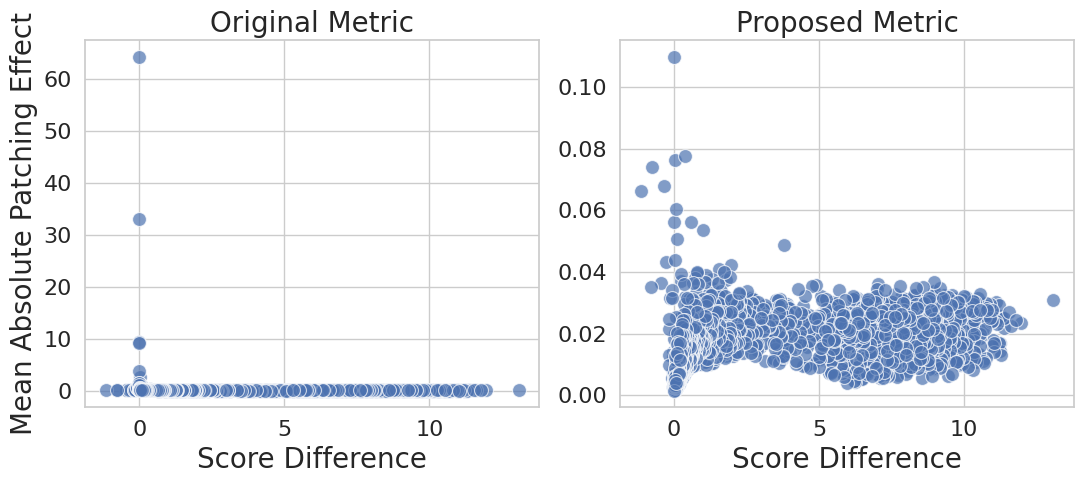

In [23]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for idx, ax in enumerate(axes):
    sns.scatterplot(
        data=data_list_cross_encoder[idx][0],
        y=data_list_cross_encoder[idx][2],
        x=data_list_cross_encoder[idx][1],
        s=100,
        alpha=0.7,
        ax=ax
    )
    ax.set_xlabel('Score Difference', fontsize=20)
    if idx == 0:
        ax.set_ylabel('Mean Absolute Patching Effect', fontsize=20)
    else:
        ax.set_ylabel('')
    # ax.set_ylabel('Mean Absolute Patching Effect', fontsize=14)
    ax.grid(True)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_title(titles_cross_encoder[idx], fontsize=20)
    
plt.tight_layout()
plt.savefig('notebooks/plots/scatter_plots_poster.pdf', bbox_inches='tight')